In [0]:
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/GuanMingChee/Big_Data_Project__PySpark/main/linux_tarCommand.txt" , "/tmp/linux.txt")

Out[2]: ('/tmp/linux.txt', <http.client.HTTPMessage at 0x7ff3e8876430>)

In [0]:
dbutils.fs.mv("file:/tmp/linux.txt","dbfs:/data/linux.txt")

Out[3]: True

In [0]:
linuxRDD = sc.textFile("dbfs:/data/linux.txt")

In [0]:
wordsRDD=linuxRDD.flatMap(lambda line : line.lower().strip().split(" "))

In [0]:
import re
# remove punction
cleanTokensRDD = wordsRDD.map(lambda w: re.sub(r'[^a-zA-Z]','',w))
#remove stopwords
from pyspark.ml.feature import StopWordsRemover
remover =StopWordsRemover()
stopwords = remover.getStopWords()
cleanwordRDD=cleanTokensRDD.filter(lambda w: w not in stopwords)
cleanword_nospaceRDD = cleanwordRDD.filter(lambda x: x != "")
#map words to key value pairs
IKVPairsRDD= cleanword_nospaceRDD.map(lambda word: (word,1))

In [0]:
wordCountRDD = IKVPairsRDD.reduceByKey(lambda acc, value: acc+value)

In [0]:
results = wordCountRDD.collect()
print(results)

[('tar', 44), ('command', 18), ('examples', 2), ('difficulty', 1), ('medium', 1), ('last', 1), ('feb', 1), ('archive', 27), ('used', 4), ('extract', 5), ('files', 20), ('provides', 1), ('use', 2), ('compressed', 2), ('uncompressed', 2), ('maintain', 1), ('options', 2), ('archivefile', 1), ('directory', 7), ('archived', 6), ('c', 11), ('verbose', 1), ('zip', 1), ('tells', 2), ('using', 11), ('j', 2), ('tbzip', 1), ('r', 1), ('update', 2), ('already', 1), ('existed', 1), ('metadata', 1), ('multiple', 3), ('single', 3), ('portability', 1), ('storage', 2), ('space', 1), ('creating', 2), ('filetar', 15), ('current', 2), ('output', 6), ('xvf', 3), ('extracts', 2), ('targz', 4), ('size', 3), ('decompress', 1), ('cvfj', 2), ('filetartbz', 5), ('examplecpp', 5), ('rootroot', 4), ('untar', 4), ('xvfj', 2), ('path', 1), ('tartbz', 2), ('filea', 4), ('check', 1), ('czf', 3), ('wc', 3), ('rvf', 1), ('contents', 1), ('tarfile', 3), ('entire', 1), ('specific', 1), ('applying', 1), ('looking', 1), ('image', 2), ('pass', 1), ('name', 3), ('search', 2), ('views', 1), ('details', 1), ('viewing', 1), ('alternatively', 1), ('wild', 1), ('symbol', 1), ('replace', 1), ('characters', 2), ('typically', 1), ('asterisk', 1), ('question', 1), ('mark', 1), ('png', 4), ('format', 1), ('extracted', 1), ('singlequotes', 1), ('incorrectly', 1), ('shell', 1), ('commands', 1), ('take', 1), ('particular', 1), ('like', 2), ('geeksforgeeks', 2), ('appearing', 1), ('page', 1), ('help', 1), ('comments', 1), ('anything', 1), ('incorrect', 1), ('share', 1), ('topic', 1), ('stop', 1), ('learning', 1), ('dsa', 2), ('concepts', 1), ('self', 1), ('paced', 1), ('price', 1), ('become', 1), ('ready', 1), ('linux', 11), ('level', 1), ('updated', 1), ('stands', 1), ('tape', 1), ('create', 3), ('one', 4), ('important', 2), ('archiving', 1), ('functionality', 1), ('also', 3), ('modify', 1), ('syntax', 1), ('file', 28), ('creates', 5), ('x', 1), ('f', 1), ('given', 1), ('filename', 3), ('displays', 2), ('lists', 1), ('u', 1), ('archives', 2), ('adds', 1), ('existing', 3), ('v', 1), ('information', 2), ('concatenates', 1), ('z', 2), ('gzip', 5), ('filter', 1), ('w', 1), ('verify', 1), ('add', 1), ('composed', 1), ('along', 2), ('collect', 1), ('data', 1), ('together', 1), ('easier', 1), ('simply', 1), ('compress', 2), ('less', 2), ('option', 9), ('cvf', 2), ('called', 2), ('osc', 10), ('extracting', 2), ('compression', 1), ('filetargz', 6), ('cvzf', 1), ('xvzf', 2), ('compresses', 1), ('takes', 1), ('time', 1), ('tvf', 7), ('rwxrwxrwx', 4), ('specified', 2), ('directoy', 1), ('tarbz', 1), ('example', 2), ('fileb', 4), ('zxvf', 1), ('jxvf', 1), ('display', 1), ('kilobyteskb', 1), ('list', 5), ('specify', 1), ('tf', 2), ('content', 1), ('pipe', 1), ('grep', 4), ('find', 3), ('mentioned', 1), ('text', 2), ('filenamefile', 1), ('extension', 2), ('argument', 1), ('wildcards', 5), ('referred', 1), ('character', 3), ('wildcard', 3), ('represent', 1), ('either', 1), ('represents', 2), ('interpret', 1), ('enclosed', 1), ('protect', 1), ('expanded', 1), ('note', 1), ('place', 1), ('present', 1), ('article', 4), ('contributed', 1), ('akansh', 1), ('gupta', 1), ('contribute', 1), ('write', 2), ('contributegeeksforgeeksorg', 2), ('mail', 1), ('see', 1), ('main', 1), ('geeks', 1), ('please', 1), ('want', 1), ('discussed', 1), ('attention', 1), ('reader', 1), ('dont', 1), ('get', 1), ('hold', 1), ('course', 1), ('studentfriendly', 1), ('industry', 1)]

In [0]:
output = sorted(results, key=lambda t: t[1], reverse=True)[:15]
print(output)

[('tar', 44), ('file', 28), ('archive', 27), ('files', 20), ('command', 18), ('filetar', 15), ('c', 11), ('using', 11), ('linux', 11), ('osc', 10), ('option', 9), ('directory', 7), ('tvf', 7), ('archived', 6), ('output', 6)]

Out[10]:

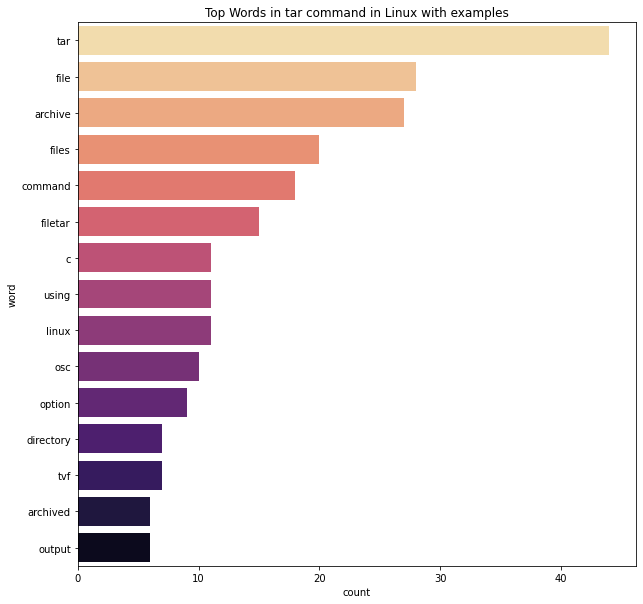

Text(0.5, 1.0, 'Top Words in tar command in Linux with examples')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
source = 'tar command in Linux with examples'
title = 'Top Words in ' + source
xlabel = 'word'
ylabel = 'count'
df = pd.DataFrame.from_records(output, columns =[xlabel, ylabel]) 
plt.figure(figsize=(10,10))
sns.barplot(ylabel, xlabel, data=df, palette="magma_r").set_title(title)